# NYC School Analysis

![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [33]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read in the data
df = pd.read_csv("schools.csv")

# Preview the data
df.head()


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [34]:
print(df.columns)

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested'],
      dtype='object')


In [35]:
# Numeric format
df['average_math'] = pd.to_numeric(df['average_math'], errors='coerce')
df['average_reading'] = pd.to_numeric(df['average_reading'], errors='coerce')
df['average_writing'] = pd.to_numeric(df['average_writing'], errors='coerce')
df['total_SAT'] = df['average_math'] + df['average_reading'] + df['average_writing']



In [36]:
# Percent test
df['sat_participation_rate'] = df['percent_tested'] / 100

Best Math Schools:
                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683


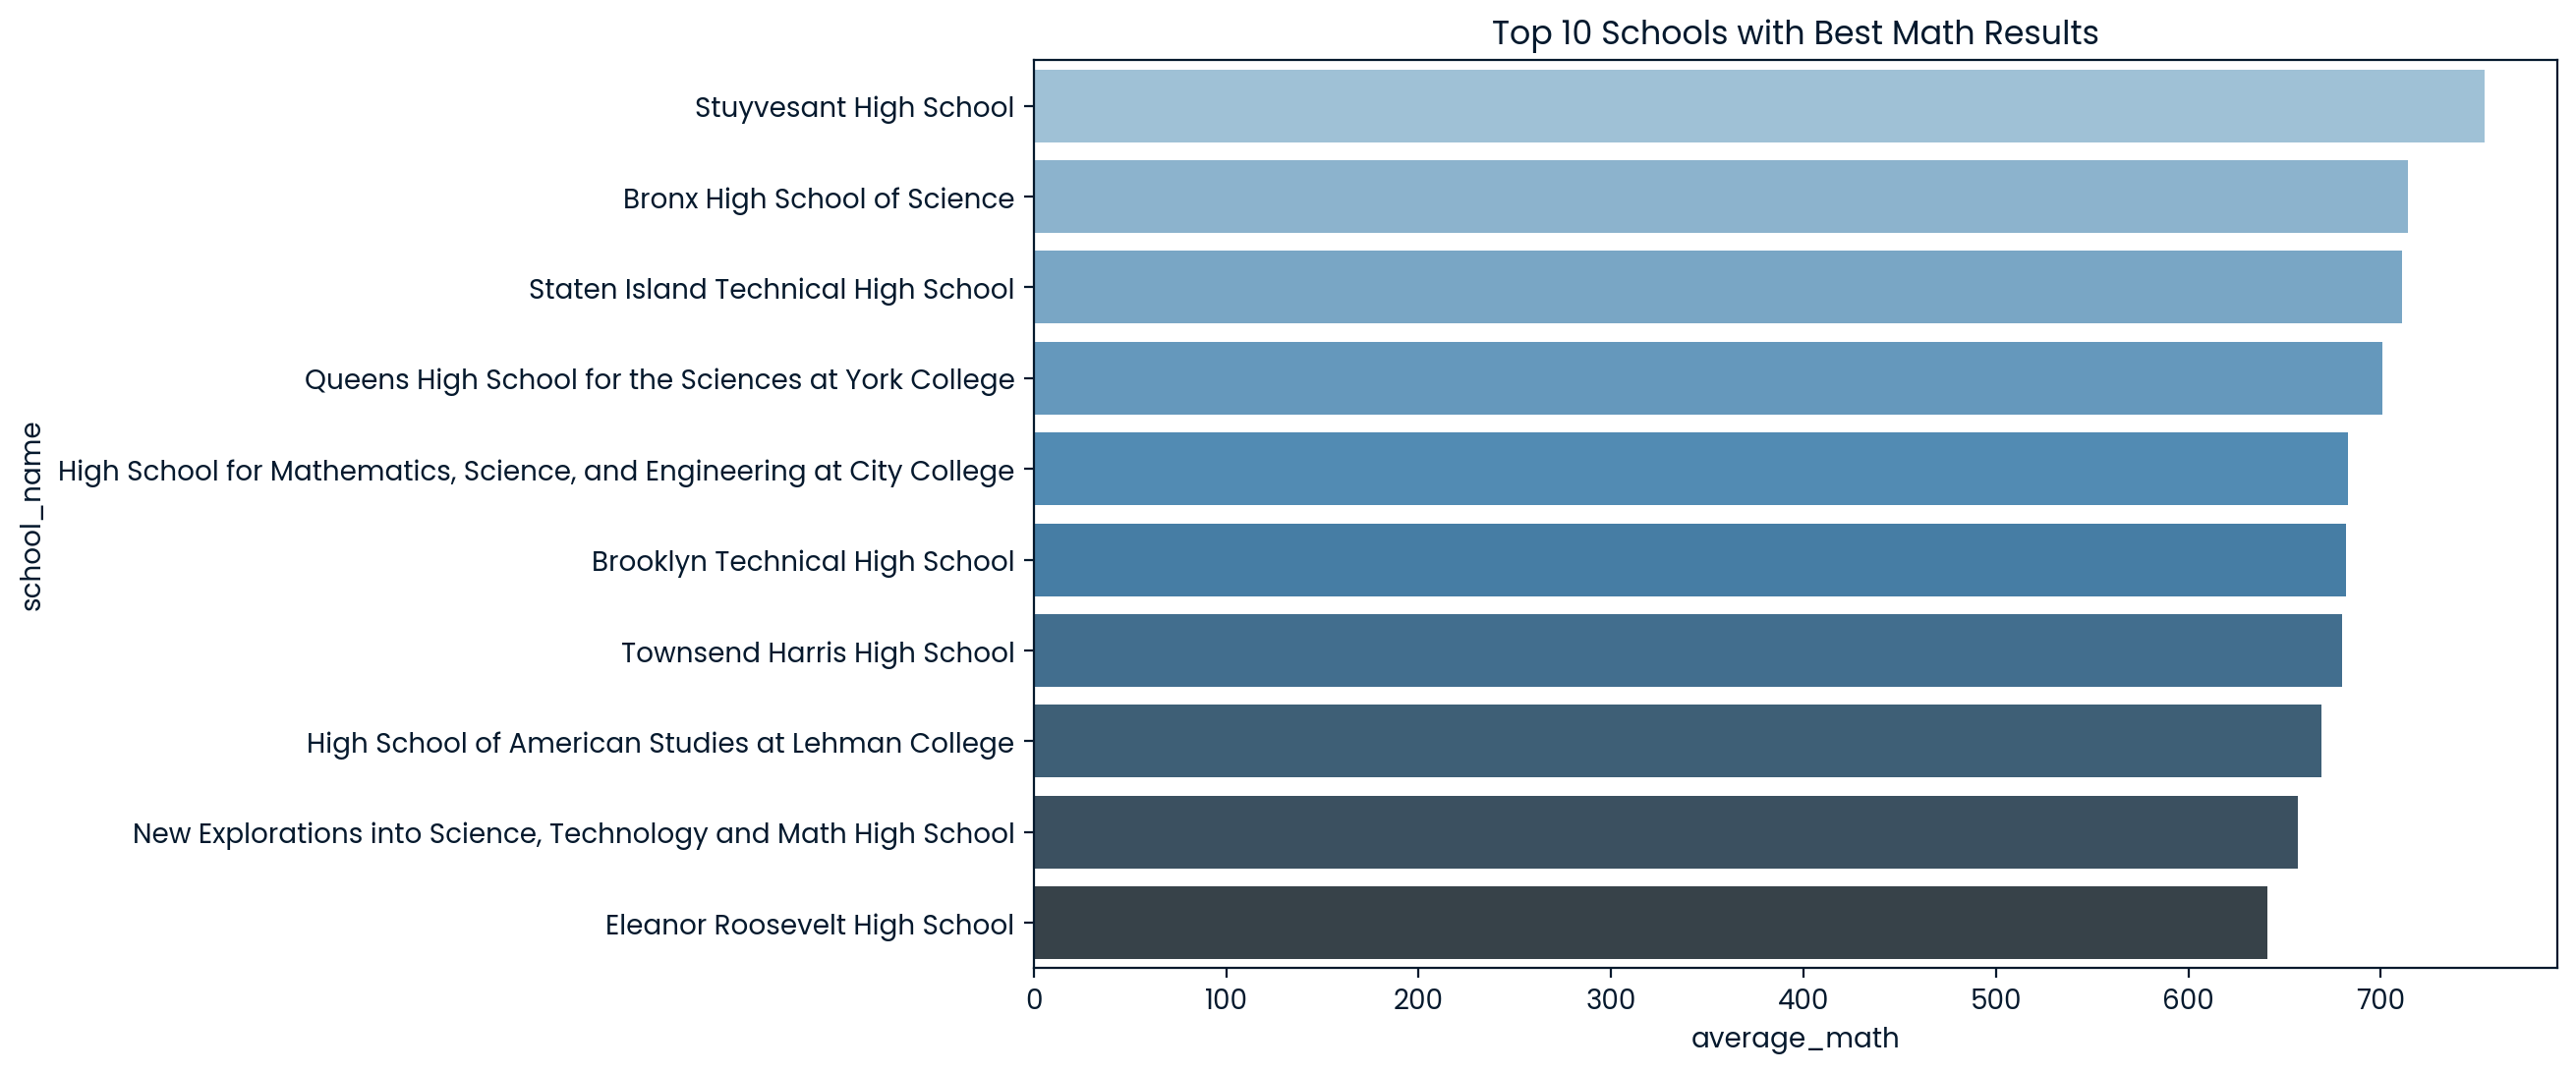

In [37]:
# 1️⃣ Best Math Schools
threshold = 0.8 * 800  # 640
best_math_schools = df[df['average_math'] >= threshold][['school_name', 'average_math']].sort_values(by='average_math', ascending=False)
print("Best Math Schools:")
print(best_math_schools.head())

plt.figure(figsize=(10, 6))
sns.barplot(x='average_math', y='school_name', data=best_math_schools.head(10), palette='Blues_d')
plt.title('Top 10 Schools with Best Math Results')
plt.show()


Top 10 Schools by Total SAT:
                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


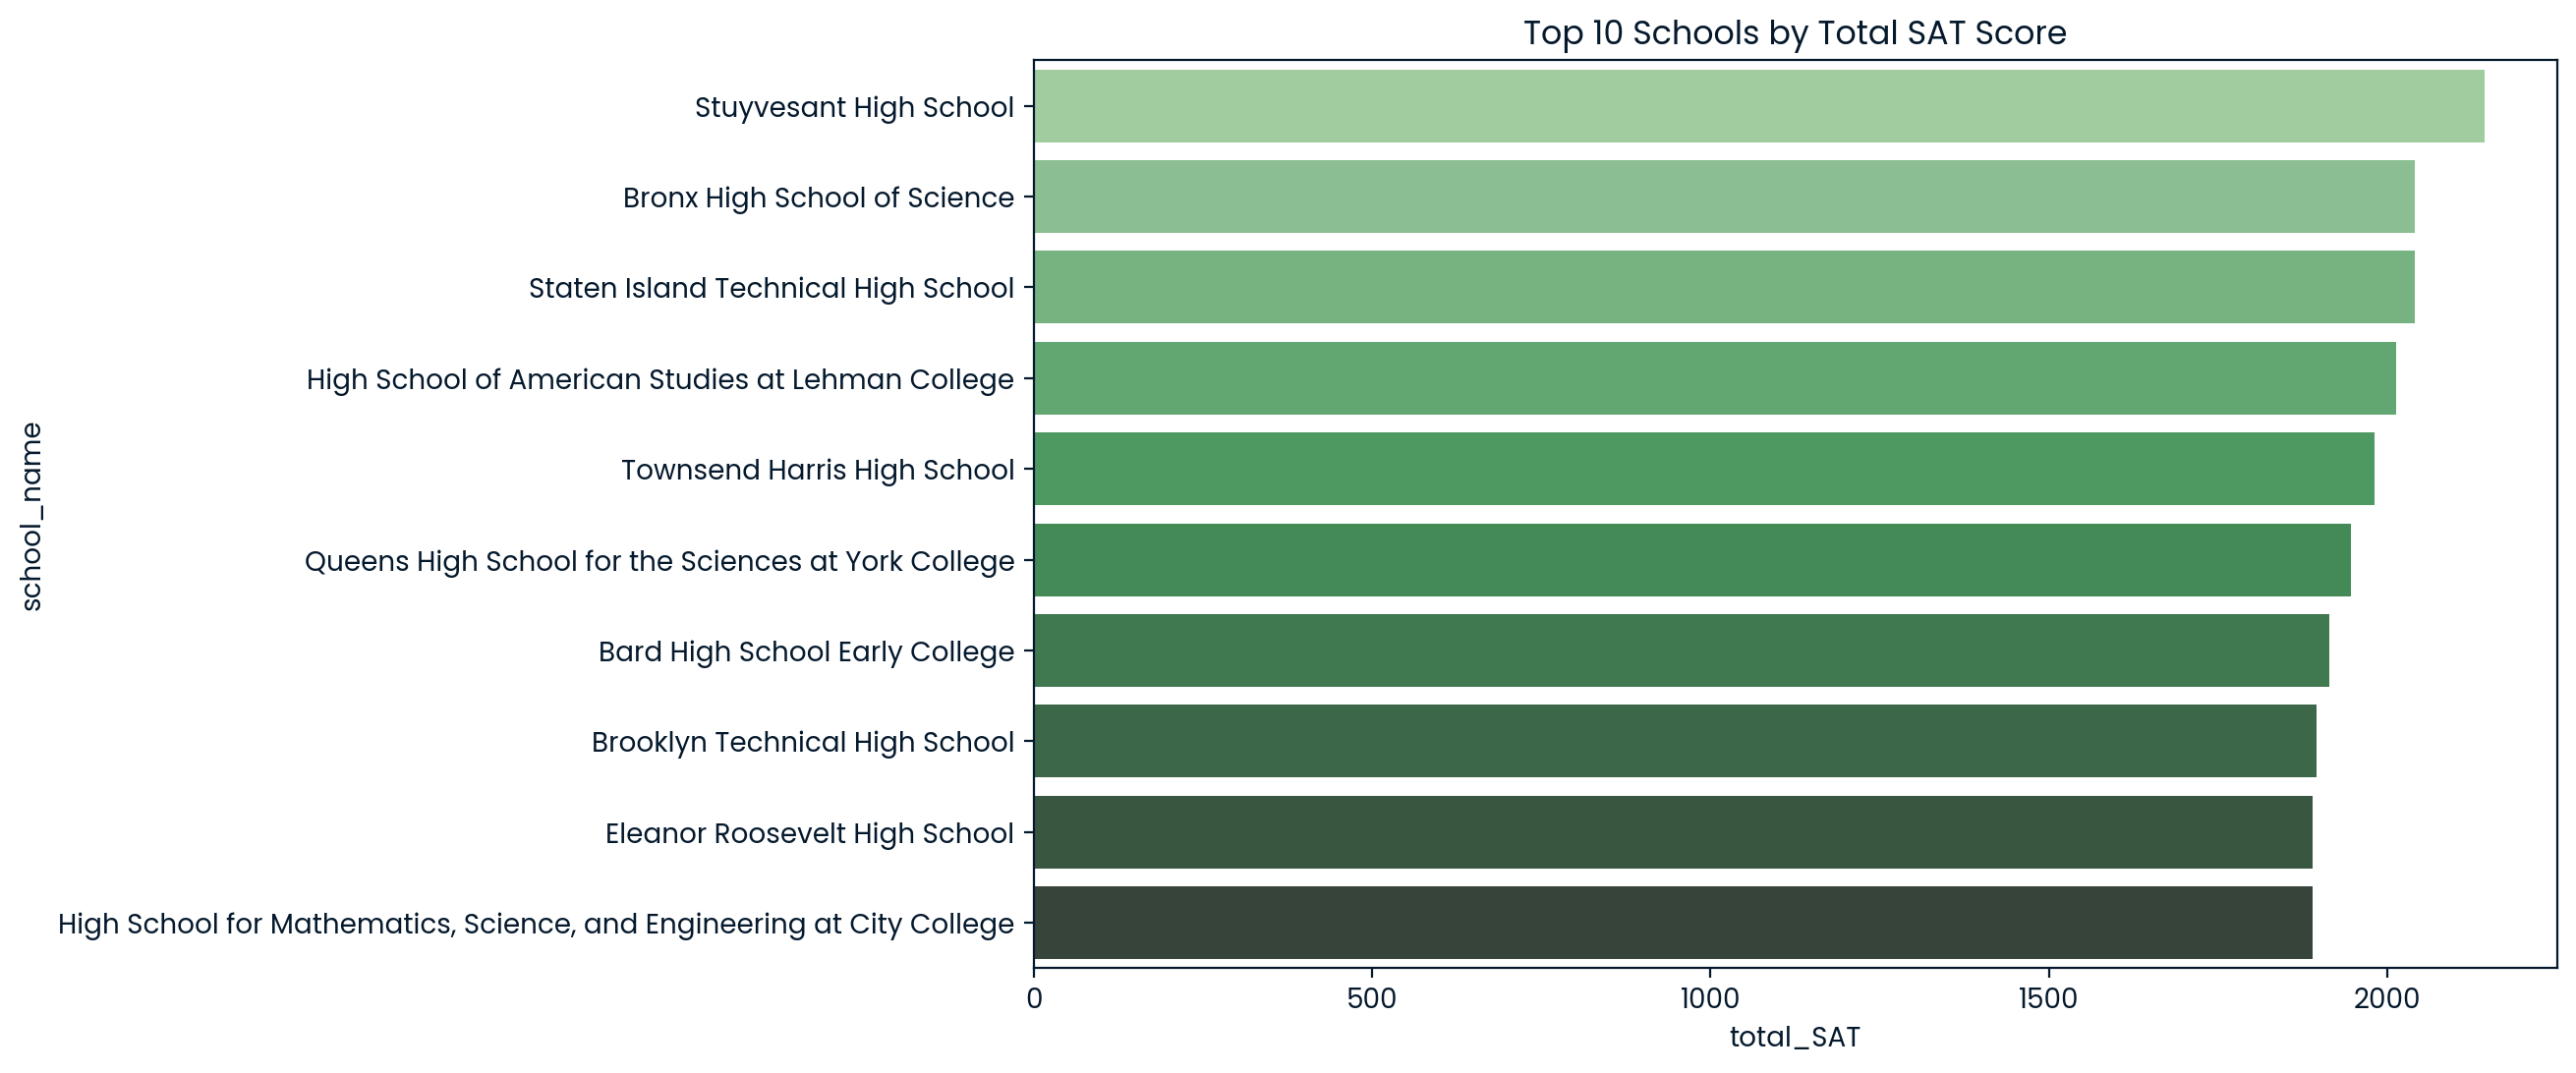

In [38]:
# 2️⃣ Top 10 Schools by Combined SAT
top_10_schools = df[['school_name', 'total_SAT']].sort_values(by='total_SAT', ascending=False).head(10)
print("\nTop 10 Schools by Total SAT:")
print(top_10_schools)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_SAT', y='school_name', data=top_10_schools, palette='Greens_d')
plt.title('Top 10 Schools by Total SAT Score')
plt.show()


Borough with Largest SAT Std Dev:
     borough  num_schools  average_SAT  std_SAT
0  Manhattan           89      1340.13   230.29


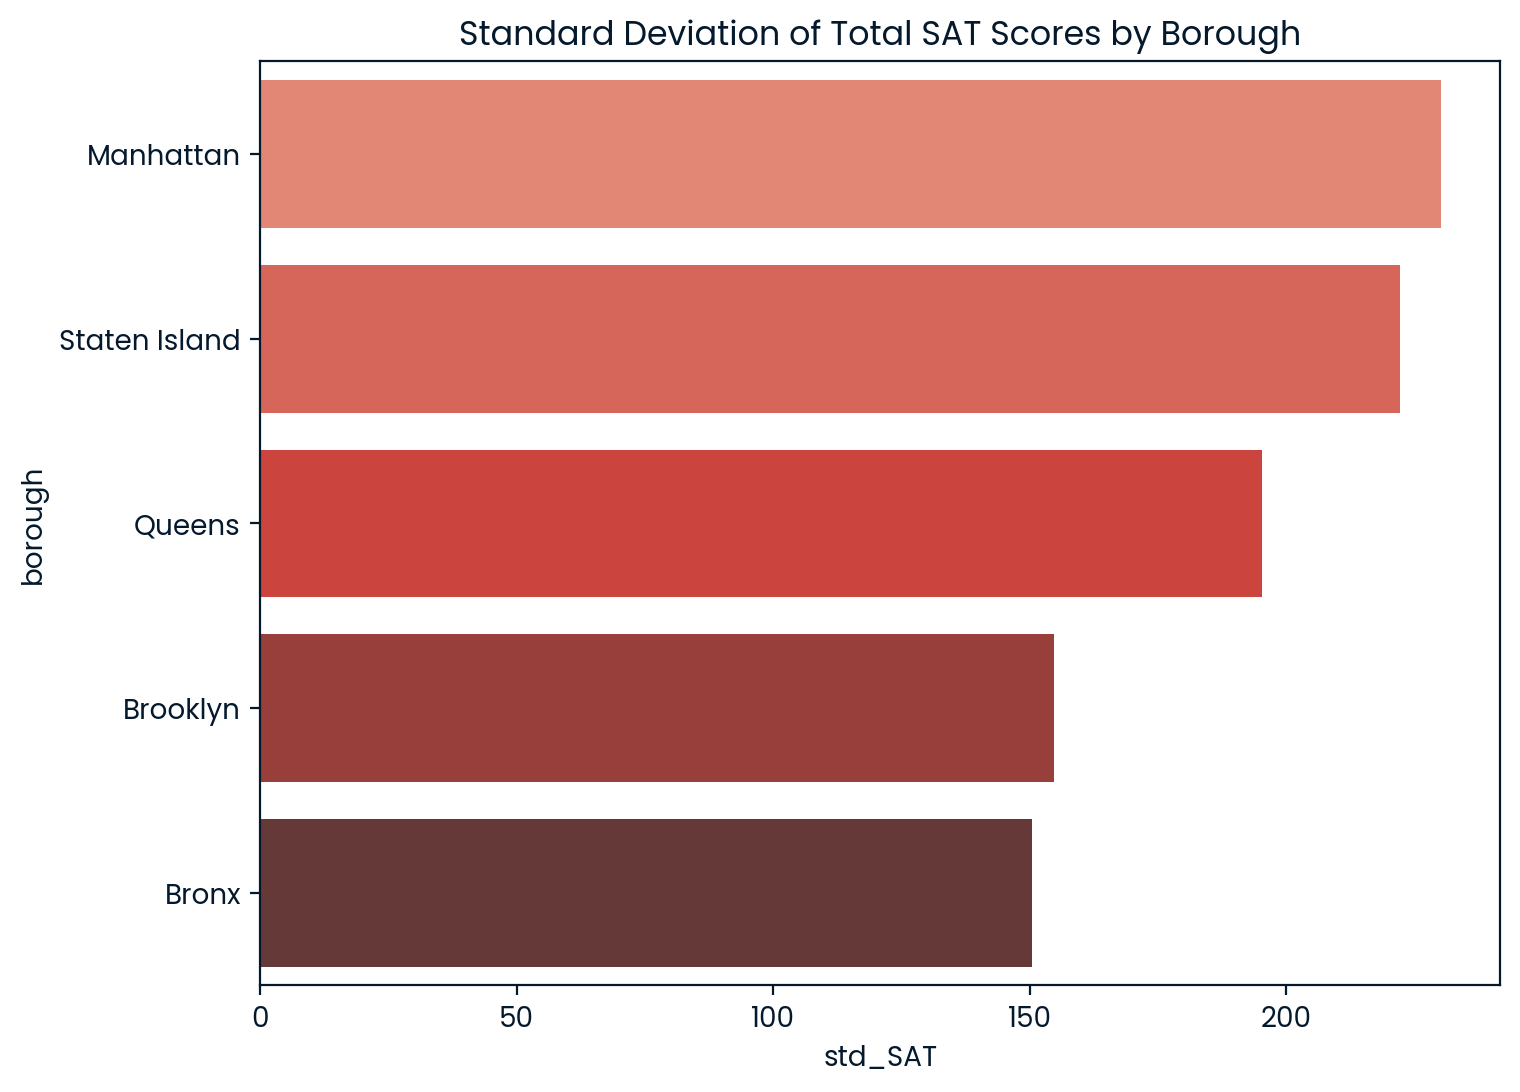

In [39]:
# 3️⃣ Borough with Largest SAT Std Dev
borough_stats = df.groupby('borough').agg(
    num_schools=('school_name', 'count'),
    average_SAT=('total_SAT', 'mean'),
    std_SAT=('total_SAT', 'std')
).reset_index()

largest_std_row = borough_stats.loc[borough_stats['std_SAT'].idxmax()]
largest_std_dev = pd.DataFrame({
    'borough': [largest_std_row['borough']],
    'num_schools': [largest_std_row['num_schools']],
    'average_SAT': [round(largest_std_row['average_SAT'], 2)],
    'std_SAT': [round(largest_std_row['std_SAT'], 2)]
})
print("\nBorough with Largest SAT Std Dev:")
print(largest_std_dev)

plt.figure(figsize=(8, 6))
sns.barplot(x='std_SAT', y='borough', data=borough_stats.sort_values(by='std_SAT', ascending=False), palette='Reds_d')
plt.title('Standard Deviation of Total SAT Scores by Borough')
plt.show()

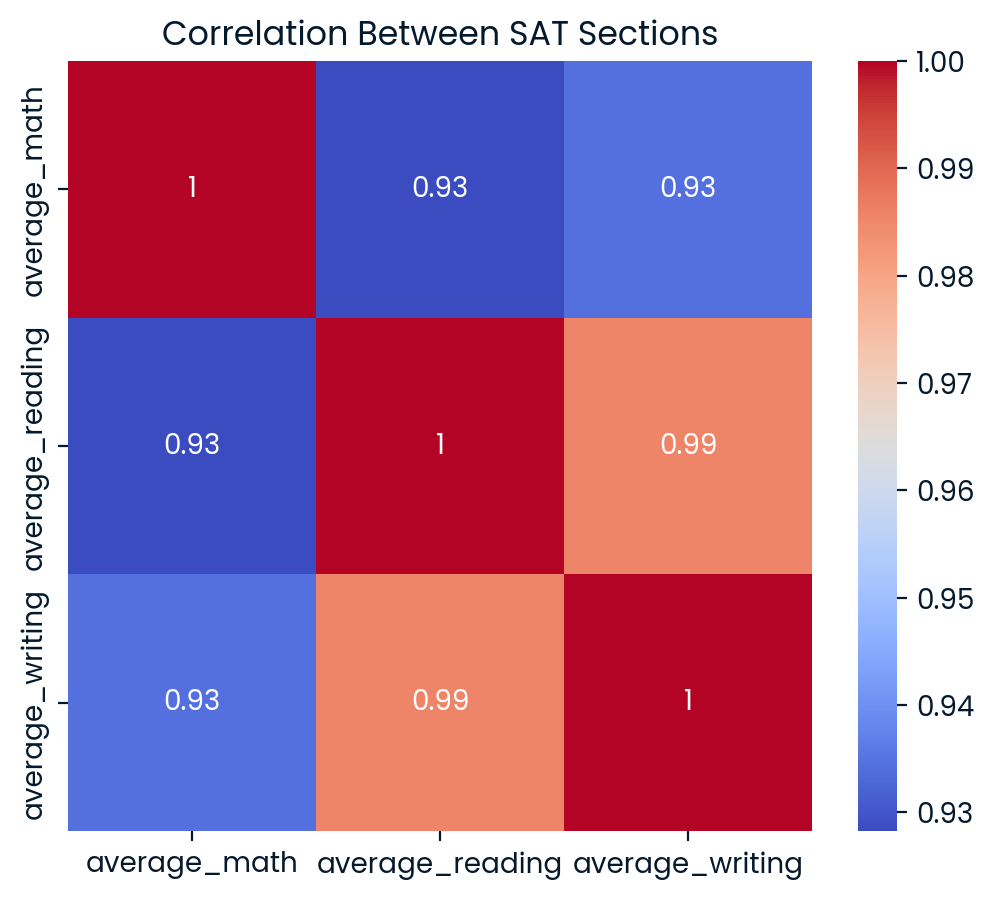

In [40]:
# 4️⃣ Correlação entre disciplinas
corr_matrix = df[['average_math', 'average_reading', 'average_writing']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between SAT Sections')
plt.show()

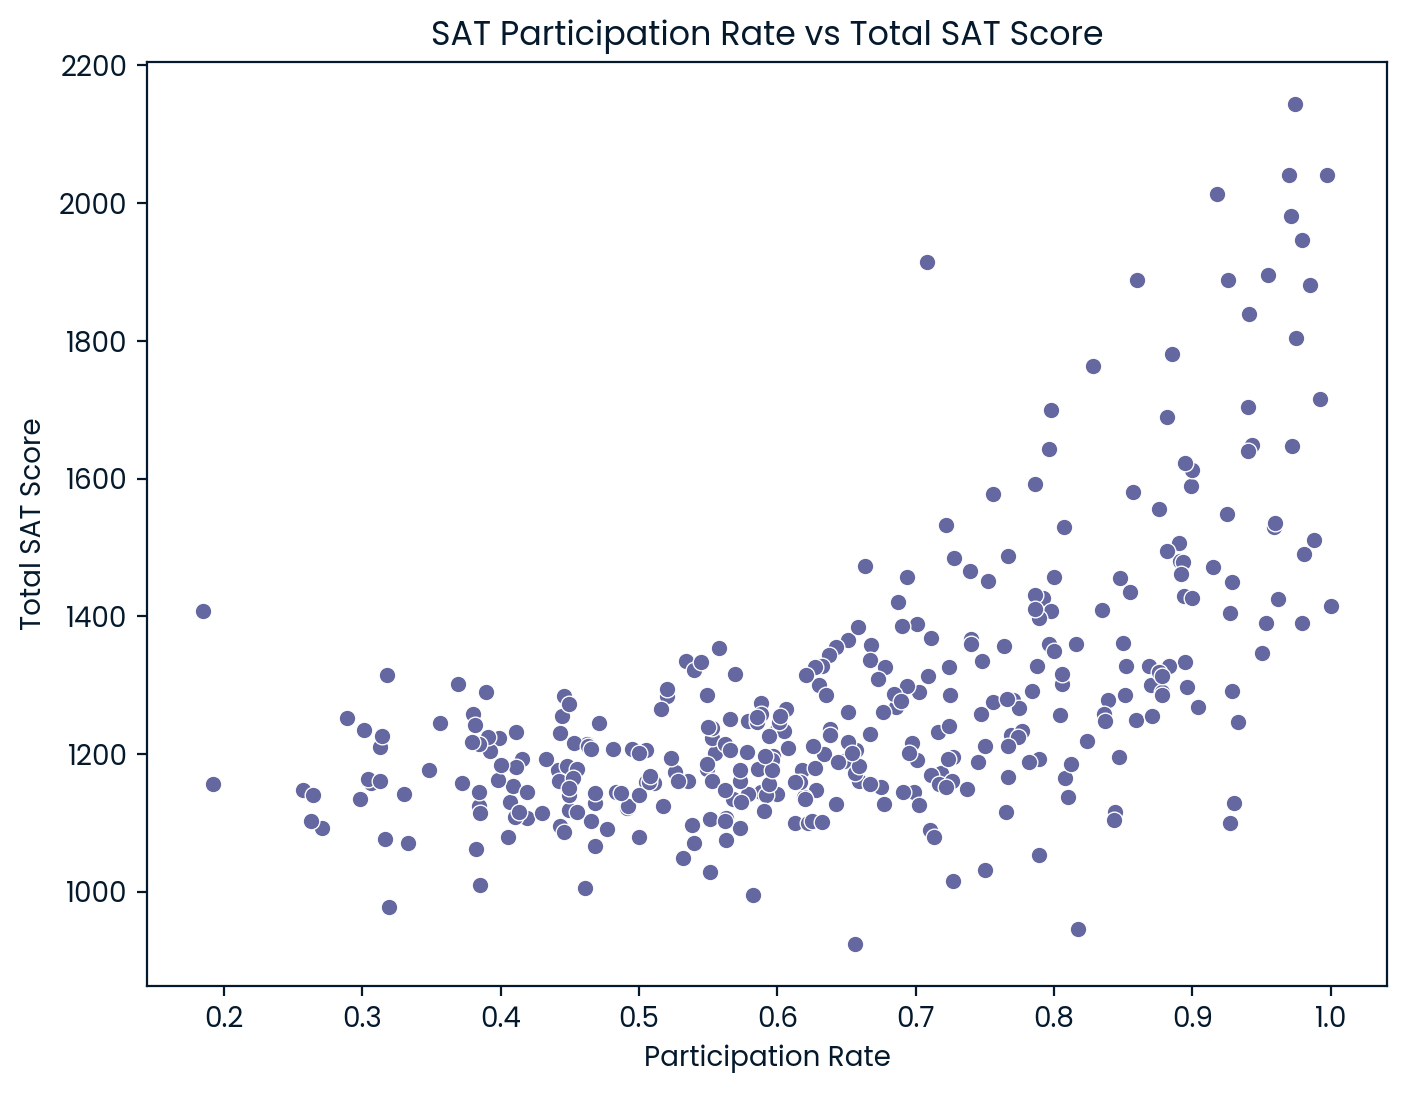

In [41]:
# 5️⃣ Participação x Total SAT (se disponível)
if 'percent_tested' in df.columns:
    df['sat_participation_rate'] = df['percent_tested'] / 100
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='sat_participation_rate', y='total_SAT', data=df)
    plt.title('SAT Participation Rate vs Total SAT Score')
    plt.xlabel('Participation Rate')
    plt.ylabel('Total SAT Score')
    plt.show()

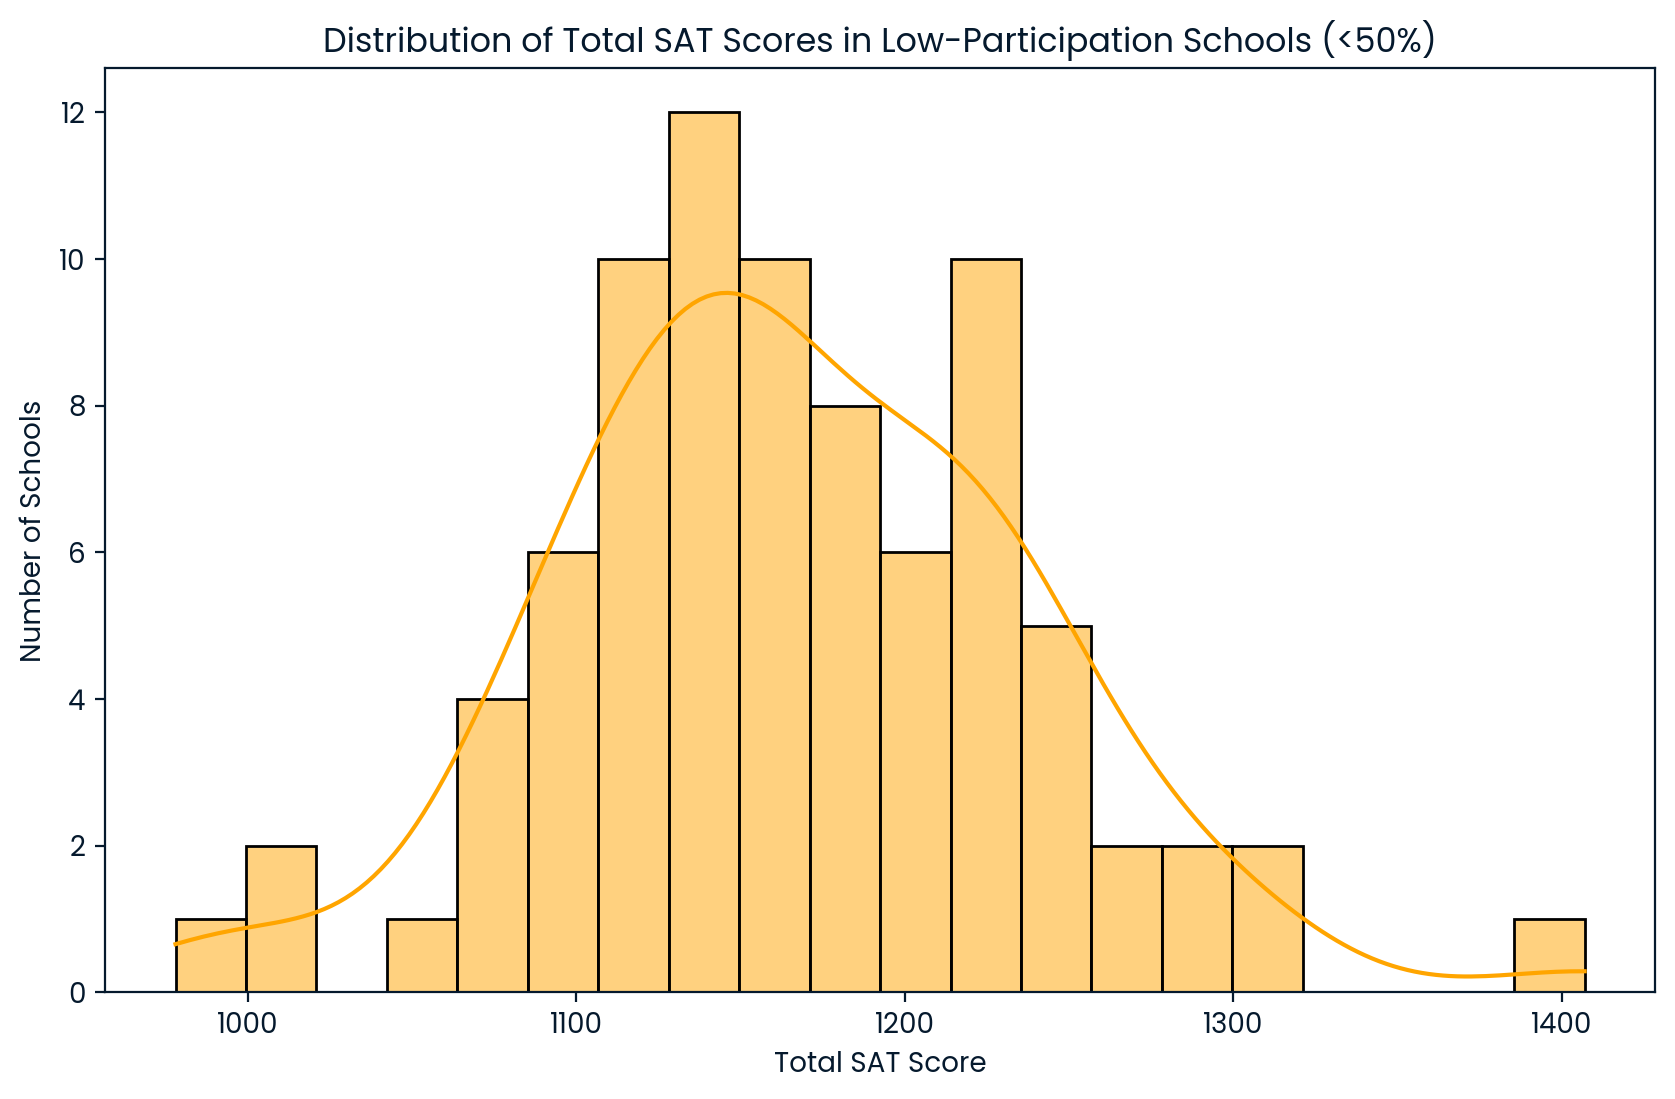

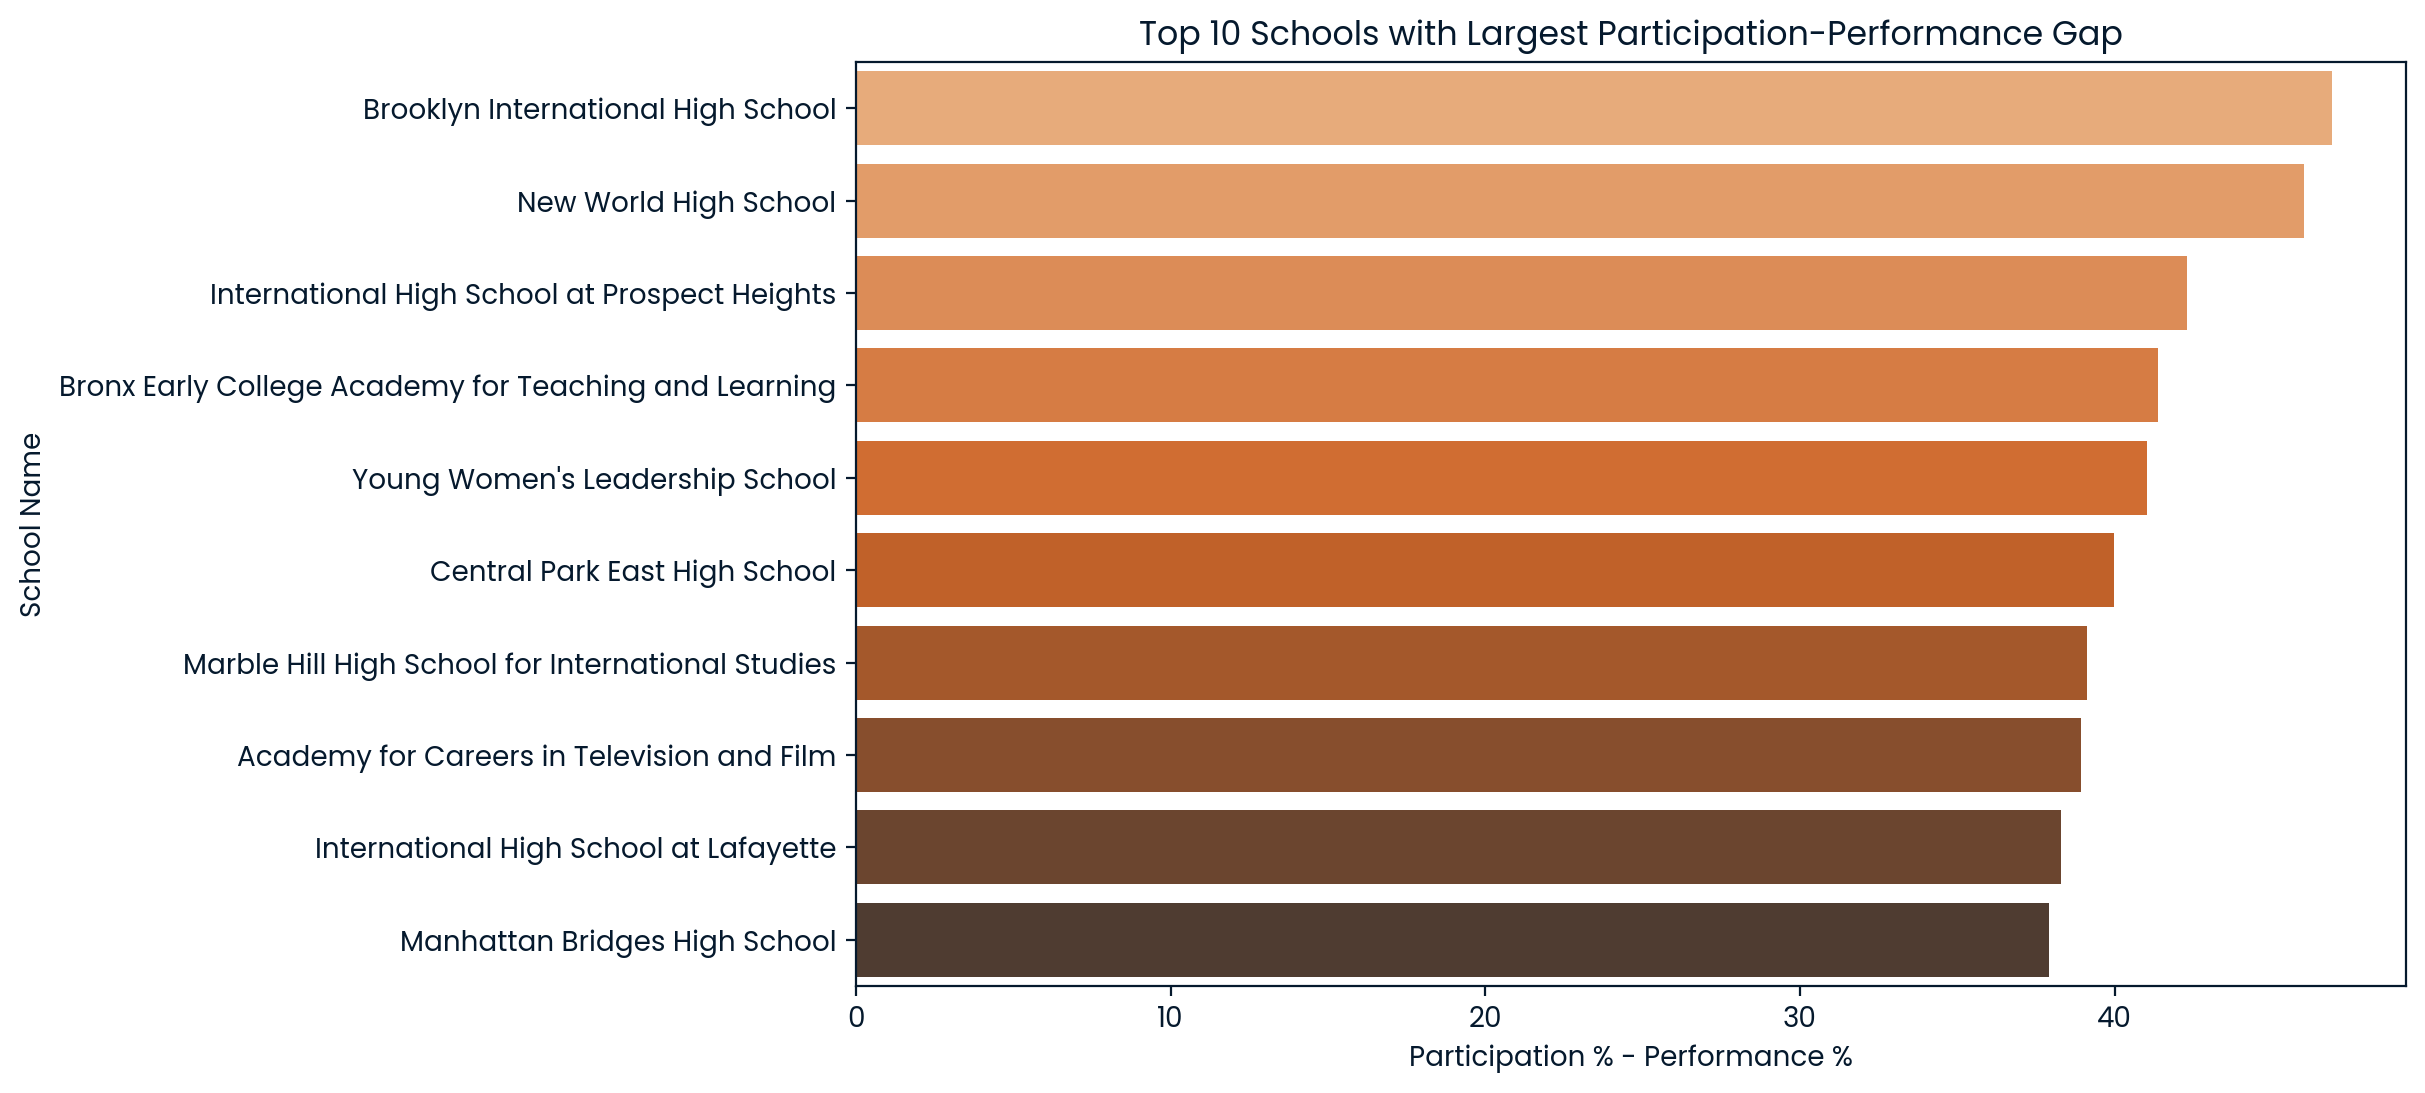

In [42]:
# Participação
if 'percent_tested' in df.columns:
    df['sat_participation_rate'] = df['percent_tested'] / 100

    # Escolas com baixa participação e desempenho baixo
    low_participation = df[df['percent_tested'] < 50]
    plt.figure(figsize=(10, 6))
    sns.histplot(low_participation['total_SAT'], bins=20, kde=True, color='orange')
    plt.title('Distribution of Total SAT Scores in Low-Participation Schools (<50%)')
    plt.xlabel('Total SAT Score')
    plt.ylabel('Number of Schools')
    plt.show()

    # Gap participação vs desempenho
    df['performance_percent'] = df['total_SAT'] / 2400 * 100
    df['participation_performance_gap'] = df['percent_tested'] - df['performance_percent']
    largest_gap = df.sort_values(by='participation_performance_gap', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='participation_performance_gap', y='school_name', data=largest_gap, palette='Oranges_d')
    plt.title('Top 10 Schools with Largest Participation-Performance Gap')
    plt.xlabel('Participation % - Performance %')
    plt.ylabel('School Name')
    plt.show()


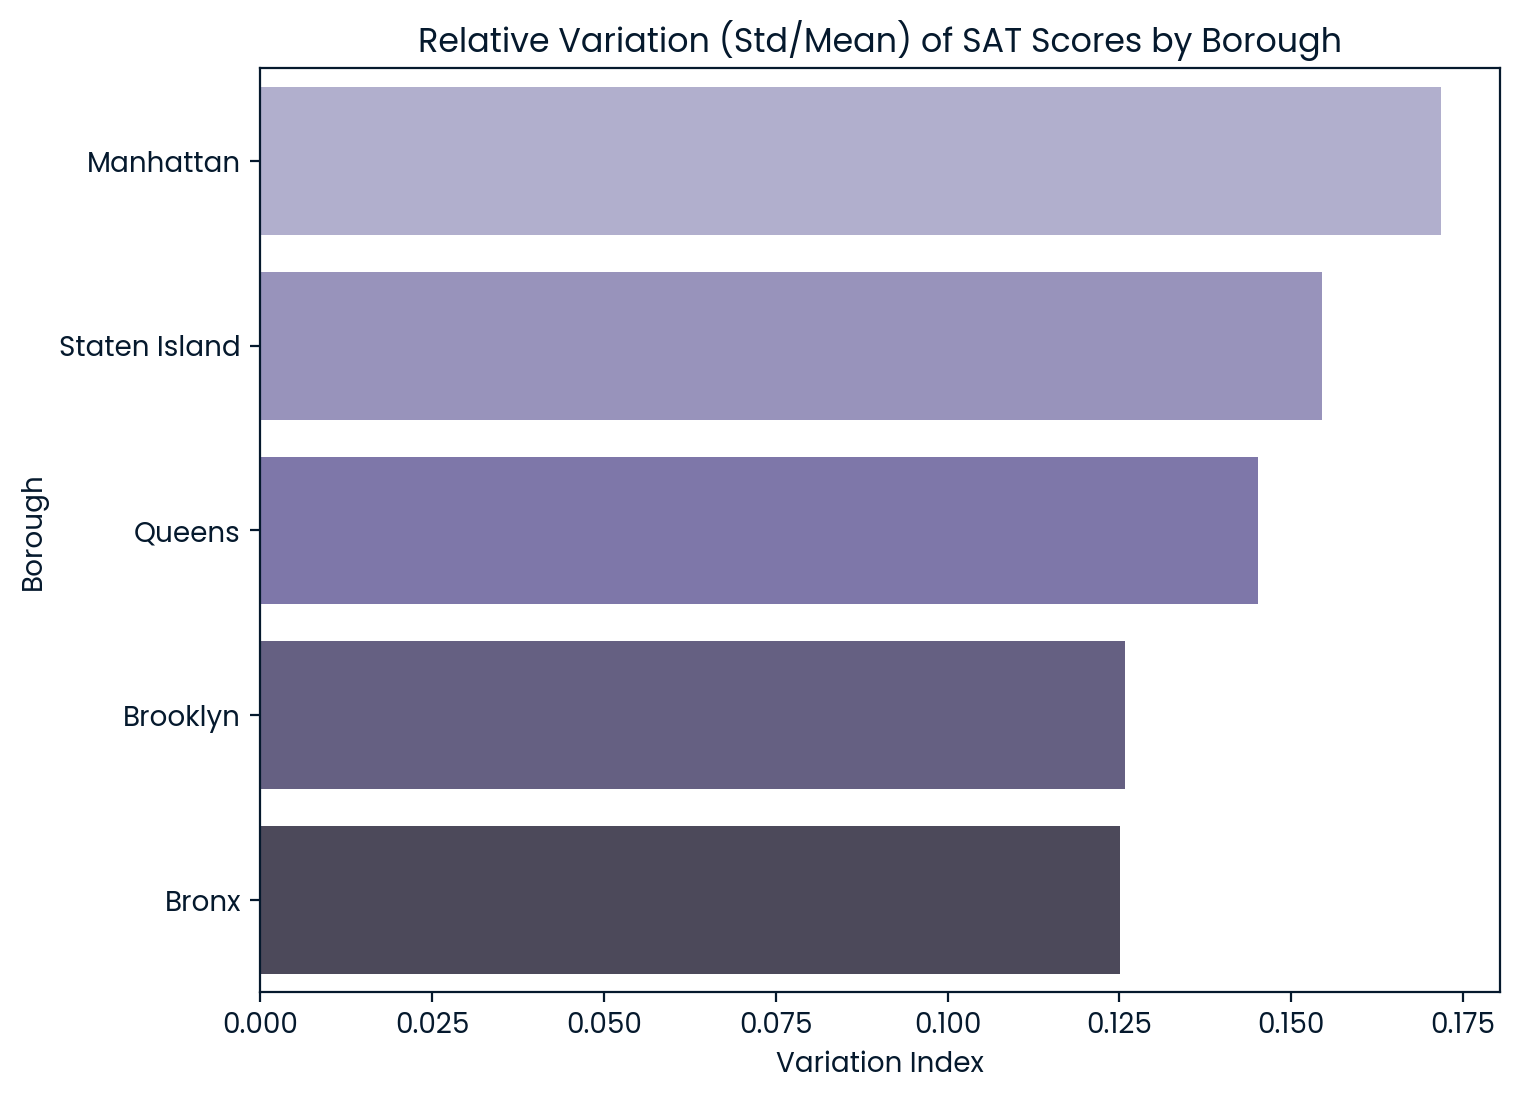

In [43]:

# Índice de variação relativa nos boroughs
borough_stats['variation_index'] = borough_stats['std_SAT'] / borough_stats['average_SAT']
plt.figure(figsize=(8, 6))
sns.barplot(x='variation_index', y='borough', data=borough_stats.sort_values(by='variation_index', ascending=False), palette='Purples_d')
plt.title('Relative Variation (Std/Mean) of SAT Scores by Borough')
plt.xlabel('Variation Index')
plt.ylabel('Borough')
plt.show()


## 📄 Justification of Analyses Based on Recent News

The analyses presented in this notebook are directly informed by recent developments and challenges reported in NYC’s public school system. Here’s how each component addresses these real-world concerns:

1. **Math Performance and Top-Scoring Schools**  
   Identifying schools with exceptional math scores (≥80% of the maximum score) and the overall top 10 schools by total SAT helps spotlight positive outliers. These schools can serve as benchmarks or case studies to understand what is working well despite the broader struggles in the system.

2. **Borough-Level Variation and Standard Deviation**  
   Examining boroughs with the largest standard deviation in SAT scores provides insight into areas with the most unequal performance. High variability often signals disparities in resources, instruction quality, or socio-economic factors—issues repeatedly flagged in recent reports.

3. **Correlation Between SAT Sections**  
   By analyzing the correlations among math, reading, and writing scores, we can assess whether improvements (or weaknesses) in one area align with others. This may guide targeted interventions to address subject-specific gaps rather than applying uniform solutions.

4. **Participation vs. Performance Analysis**  
   Recent news highlights alarmingly high chronic absenteeism and reduced test participation post-pandemic. Analyzing schools with low participation rates and their corresponding SAT scores provides a data-driven view of how engagement levels are impacting performance.

5. **Gap Between Participation and Achievement**  
   Calculating the difference between the percentage of students tested and their proportional SAT performance uncovers schools where high participation is not translating into strong outcomes—or conversely, where small groups of high performers stand out. This metric surfaces hidden imbalances worth investigating.

6. **Relative Variation Index (Standard Deviation / Mean)**  
   This index helps identify boroughs where inconsistency dominates, potentially pointing to systemic instability or local challenges in maintaining performance standards across schools.

### 🌎 Broader Context

These analyses are crucial at a time when NYC faces persistent post-pandemic educational challenges, such as technological difficulties with digital testing, rising absenteeism, and flatlining academic progress. Using SAT performance data as a lens allows us to ground policy discussions and resource allocations in hard evidence, ultimately aiming to bridge the gap between data signals and actionable solutions.

